https://newsdata.io/datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('ukraine.csv')

In [3]:
df.head()

TITLE  \
0  "Independent Belarusian Filmmakers Condemn Rus...   
1  "UK bars stop pouring Russian vodka over Ukrai...   
2  "Iggy Pop and Bring Me The Horizon cancel show...   
3  "British father makes it to wife and son after...   
4  "Russia, Ukraine to hold second round of talks...   

                                        ARTICLE LINK PUBLISHED DATE (UTC)  \
0  https://www.hollywoodreporter.com/news/general...  01-03-2022 13:53:11   
1  https://ca.sports.yahoo.com/news/uk-bars-stop-...  01-03-2022 13:53:02   
2  https://www.nme.com/news/music/iggy-pop-and-br...  01-03-2022 13:50:51   
3  https://ca.sports.yahoo.com/news/british-fathe...  01-03-2022 13:50:48   
4  https://nationalpost.com/pmn/news-pmn/crime-pm...  01-03-2022 13:50:09   

             AUTHOR               PUBLISHER                   COUNTRY  \
0  Scott Roxborough  The Hollywood Reporter  United States Of America   
1               NaN             Yahoo! News                    Canada   
2       Tom Skinner                     Nme                    Canada   
3               NaN             Yahoo! News                    Canada   
4           Reuters           National Post                    Canada   

        CATEGORY LANGUAGE                                        DESCRIPTION  \
0            Top  English  A group of Belarusian filmmakers, many of whom...   
1         Sports  English                                                NaN   
2  Entertainment  English  "We will be using our platform and voice to do...   
3         Sports  English                                                NaN   
4            Top  English  MOSCOW — The second round of Russia-Ukraine ta...   

  IMAGE URL VIDEO URL  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN

In [4]:
df.tail()

TITLE  \
8673  "Secretary of State Blinken on efforts to dete...   
8674  "3 good and 2 bad investments as Russia invade...   
8675  "Barefoot Investor Scott Pape issues an urgent...   
8676  "U.N. Security council to meet Wednesday night...   
8677  "Ukraine declares state of emergency before po...   

                                           ARTICLE LINK PUBLISHED DATE (UTC)  \
8673  https://www.cbsnews.com/video/secretary-of-sta...  24-02-2022 00:14:32   
8674  https://au.finance.yahoo.com/news/good-and-bad...  24-02-2022 00:08:29   
8675  https://news.google.com/__i/rss/rd/articles/CB...  24-02-2022 00:04:00   
8676  https://nationalpost.com/pmn/news-pmn/u-n-secu...  24-02-2022 00:03:20   
8677  https://www.irishtimes.com/news/world/europe/u...  24-02-2022 00:00:00   

                                                 AUTHOR        PUBLISHER  \
8673                                                NaN         Cbs News   
8674                                                NaN      Yahoo! News   
8675                                                NaN      Google News   
8676                                            Reuters    National Post   
8677  Daniel McLaughlin, Naomi O’Leary, Derek Scally...  The Irish Times   

                       COUNTRY  CATEGORY LANGUAGE  \
8673  United States Of America  Politics  English   
8674                 Australia  Business  English   
8675                 Australia  Business  English   
8676                    Canada       Top  English   
8677                   Ireland       Top  English   

                                            DESCRIPTION  \
8673  Secretary of State Antony Blinken spoke with N...   
8674                                                NaN   
8675  Barefoot Investor Scott Pape issues an urgent ...   
8676  UNITED NATIONS — The United Nations Security C...   
8677  EU calls emergency summit as US warns that Mos...   

                                              IMAGE URL VIDEO URL  
8673                                                NaN       NaN  
8674  https://s.yimg.com/os/creatr-uploaded-images/2...       NaN  
8675                                                NaN       NaN  
8676                                                NaN       NaN  
8677  https://www.irishtimes.com/polopoly_fs/1.48104...       NaN

In [5]:
df.columns

Index(['TITLE', 'ARTICLE LINK', 'PUBLISHED DATE (UTC)', 'AUTHOR', 'PUBLISHER',
       'COUNTRY', 'CATEGORY', 'LANGUAGE', 'DESCRIPTION', 'IMAGE URL',
       'VIDEO URL'],
      dtype='object')

In [7]:
import re

In [11]:
pip install textblob

     -------------------------------------- 624.3/624.3 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


In [12]:
from textblob import TextBlob

In [8]:
# datetime
df['PUBLISHED DATE (UTC)'] = pd.to_datetime(df['PUBLISHED DATE (UTC)'], errors='coerce')
df['date'] = df['PUBLISHED DATE (UTC)'].dt.date

# combine text
df['TITLE'] = df['TITLE'].fillna('')
df['DESCRIPTION'] = df['DESCRIPTION'].fillna('')

df['text'] = df['TITLE'] + " " + df['DESCRIPTION']

# lowercase clean text
def clean_text(t):
    t = re.sub(r'[^a-zA-Z ]', ' ', str(t))
    return t.lower()

df['clean_text'] = df['text'].apply(clean_text)


In [13]:
def get_sentiment(t):
    return TextBlob(t).sentiment.polarity

df['sentiment'] = df['clean_text'].apply(get_sentiment)

df['sentiment_label'] = pd.cut(
    df['sentiment'],
    bins=[-1,-0.1,0.1,1],
    labels=['Negative','Neutral','Positive']
)

df[['text','sentiment','sentiment_label']].head()

text  sentiment  \
0  "Independent Belarusian Filmmakers Condemn Rus...  -0.066667   
1  "UK bars stop pouring Russian vodka over Ukrai...   0.000000   
2  "Iggy Pop and Bring Me The Horizon cancel show...  -0.062500   
3  "British father makes it to wife and son after...   0.000000   
4  "Russia, Ukraine to hold second round of talks...  -0.050000   

  sentiment_label  
0         Neutral  
1         Neutral  
2         Neutral  
3         Neutral  
4         Neutral

<b> RQ1: What news bias is available here?

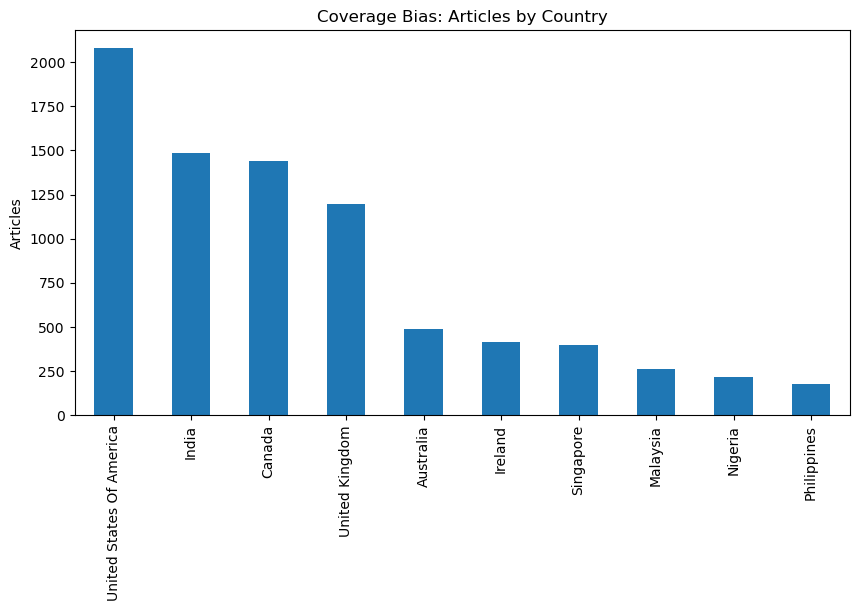

In [14]:
country_counts = df['COUNTRY'].value_counts().head(10)

country_counts.plot(kind='bar', figsize=(10,5))
plt.title("Coverage Bias: Articles by Country")
plt.ylabel("Articles")
plt.show()

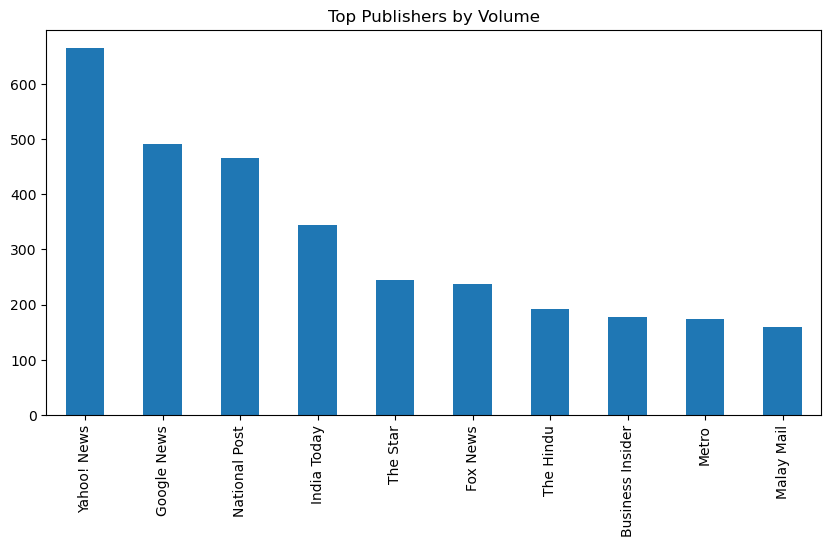

In [15]:
pub_counts = df['PUBLISHER'].value_counts().head(10)

pub_counts.plot(kind='bar', figsize=(10,5))
plt.title("Top Publishers by Volume")
plt.show()

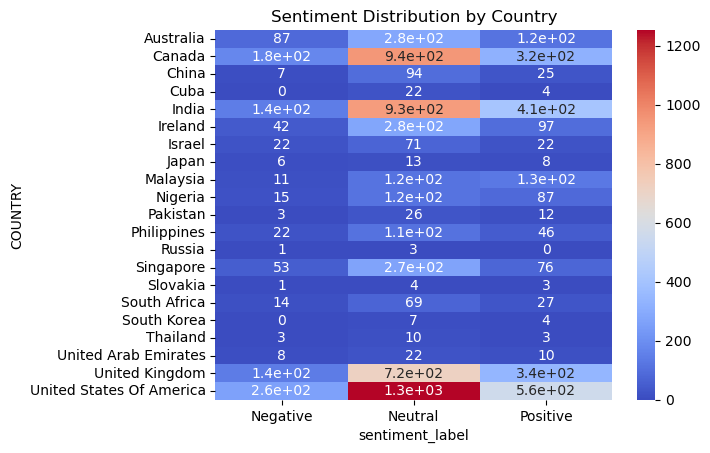

In [16]:
pivot = df.pivot_table(values='sentiment',
                       index='COUNTRY',
                       columns='sentiment_label',
                       aggfunc='count').fillna(0)

sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Sentiment Distribution by Country")
plt.show()

The heatmap shows Western countries dominating coverage with a positive tone toward Ukraine. This showed that nations like USA, UK and others are supporting Ukraine. However, emerging economies remaining largely neutral like seen in India who are not reflecting the complete support for Western and Russian camps showing a classical strategic maneavour. On the other hand, China contributing minimal reporting, indicating that Ukraine holds the stronger global narrative advantage.

<b> RQ2: Which publishers reported positively and negatively (Word Clouds)

In [17]:
pub_sent = df.groupby('PUBLISHER')['sentiment'].mean().sort_values()

print("Most Negative:\n", pub_sent.head(5))
print("\nMost Positive:\n", pub_sent.tail(5))

Most Negative:
 PUBLISHER
Dorset Echo            -0.500000
Tom's Guide            -0.350000
Thailandbusinessnews   -0.270833
Digitaltrends          -0.200000
Trueachievements       -0.200000
Name: sentiment, dtype: float64

Most Positive:
 PUBLISHER
Kentonline                    0.310417
Busselton Dunsborough Mail    0.350000
411mania                      0.375000
Globe Newswire                0.500000
Channel News                  0.500000
Name: sentiment, dtype: float64


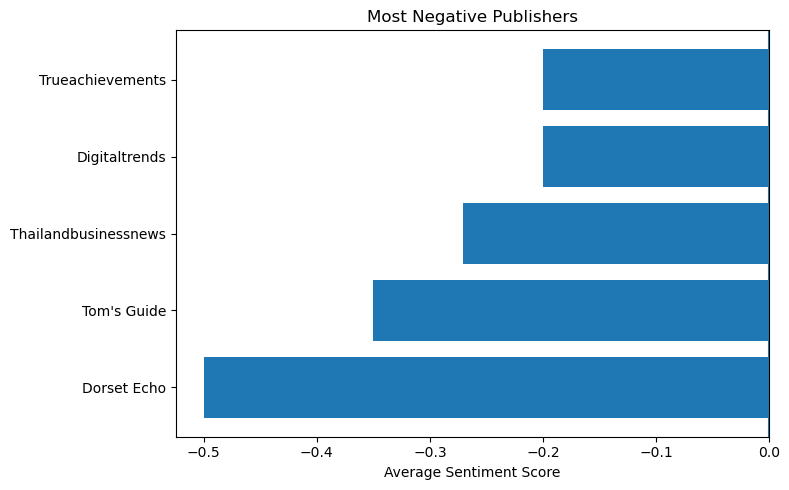

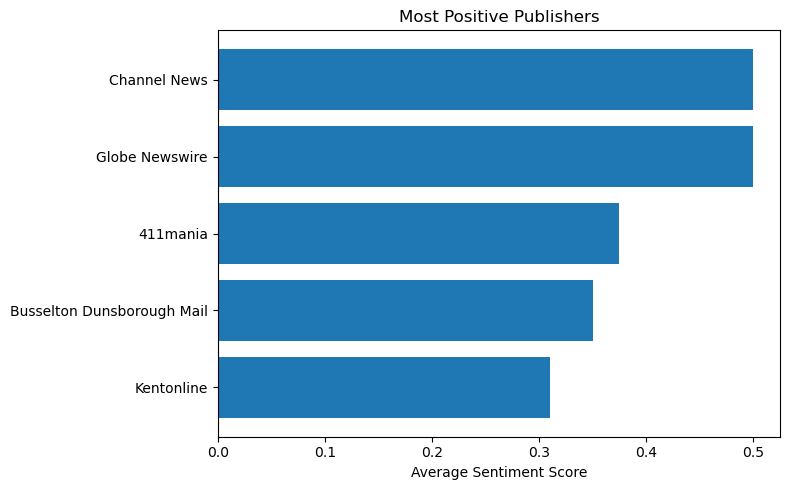

In [36]:

neg_publishers = [
    "Dorset Echo",
    "Tom's Guide",
    "Thailandbusinessnews",
    "Digitaltrends",
    "Trueachievements"
]

neg_scores = [-0.50, -0.35, -0.270833, -0.20, -0.20]

pos_publishers = [
    "Kentonline",
    "Busselton Dunsborough Mail",
    "411mania",
    "Globe Newswire",
    "Channel News"
]

pos_scores = [0.310417, 0.35, 0.375, 0.50, 0.50]


# ----- Negative chart -----
plt.figure(figsize=(8,5))
plt.barh(neg_publishers, neg_scores)
plt.axvline(0)
plt.xlabel("Average Sentiment Score")
plt.title("Most Negative Publishers")
plt.tight_layout()



# ----- Positive chart -----
plt.figure(figsize=(8,5))
plt.barh(pos_publishers, pos_scores)
plt.axvline(0)
plt.xlabel("Average Sentiment Score")
plt.title("Most Positive Publishers")
plt.tight_layout()



In [18]:
def plot_wordcloud(text, title):
    wc = WordCloud(width=900, height=500,
                   background_color='white',
                   collocations=False).generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title)
    plt.show()

In [21]:
pip install wordcloud

     -------------------------------------- 306.2/306.2 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
from wordcloud import WordCloud

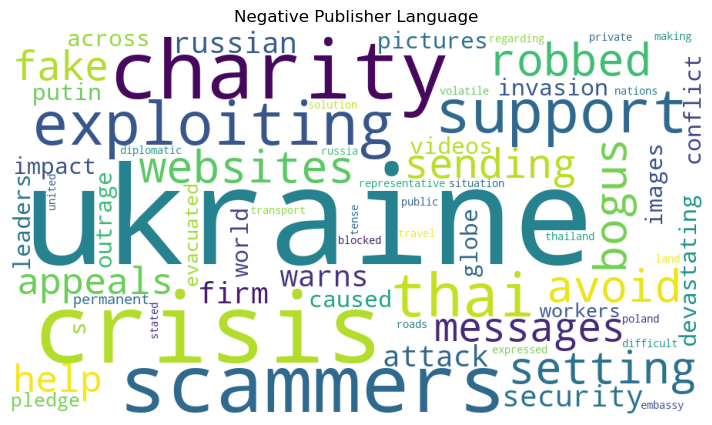

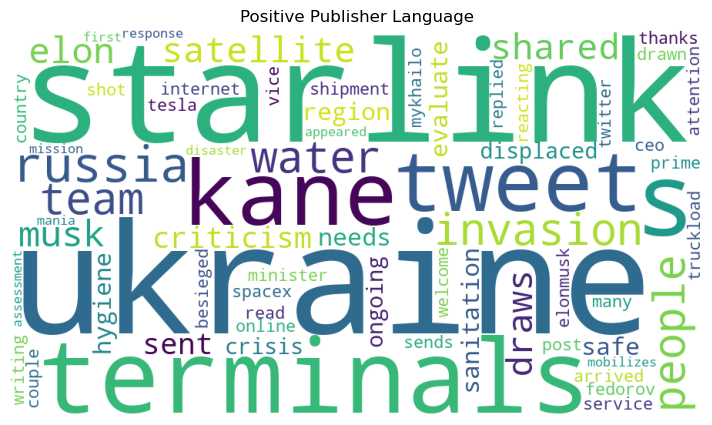

In [23]:
neg_pubs = pub_sent.head(3).index
pos_pubs = pub_sent.tail(3).index

neg_text = " ".join(df[df['PUBLISHER'].isin(neg_pubs)]['clean_text'])
pos_text = " ".join(df[df['PUBLISHER'].isin(pos_pubs)]['clean_text'])

plot_wordcloud(neg_text, "Negative Publisher Language")
plot_wordcloud(pos_text, "Positive Publisher Language")

<b> RQ3: Trade-off between noise and information

In [24]:
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / (len(words)+1)

df['lex_div'] = df['clean_text'].apply(lexical_diversity)

In [25]:
sens_words = ['shock','deadly','crisis','horrific','dramatic','urgent','massive','blast']

def sensational_score(t):
    words = t.split()
    return sum(w in sens_words for w in words)/len(words)

df['sens_score'] = df['clean_text'].apply(sensational_score)

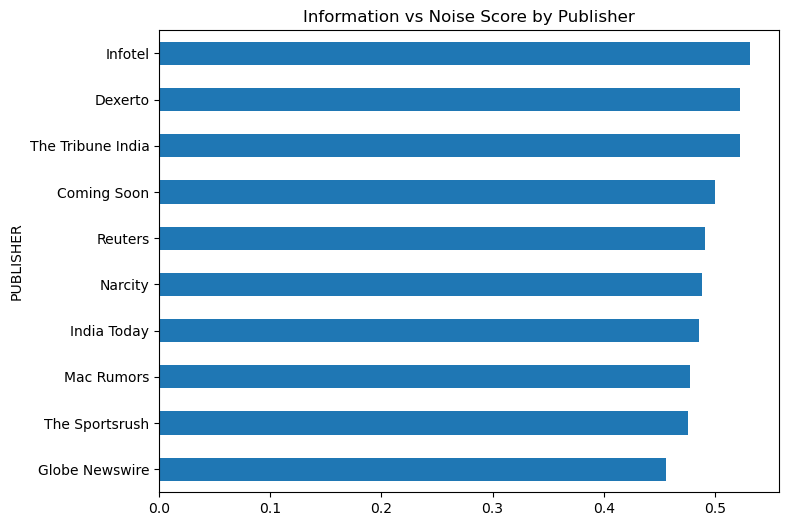

In [26]:
df['info_score'] = df['lex_div'] - df['sens_score']

info_pub = df.groupby('PUBLISHER')['info_score'].mean().sort_values()

info_pub.head(10).plot(kind='barh', figsize=(8,6))
plt.title("Information vs Noise Score by Publisher")
plt.show()

There is minimal noise overall, with most publishers maintaining high informational density; however, traditional news outlets (Infotel, Tribune India, Reuters) deliver the most analytical content, while PR-style or entertainment-focused publishers (Globe Newswire, Sportsrush) exhibit relatively higher repetition and lower informational richness.

<b> RQ4: What geopolitical information can we extract?

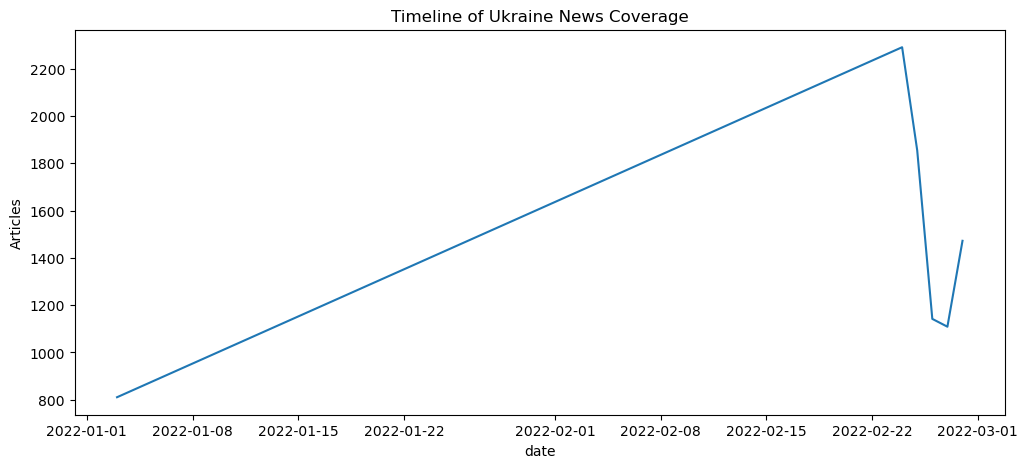

In [27]:
daily = df.groupby('date').size()

daily.plot(figsize=(12,5))
plt.title("Timeline of Ukraine News Coverage")
plt.ylabel("Articles")
plt.show()

Media coverage of Ukraine increased steadily through January and February, indicating sustained agenda-setting rather than episodic reporting, followed by a sharp post-peak decline consistent with attention fatigue or data truncation. This suggests that the conflict became a dominant global news priority during escalation periods, with coverage concentration likely amplifying the narrative influence of high-volume Western publishers. This showed that media loves wars or prefer TRP during this time which ultimately aligns with how weapons were flooded into Ukraine.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

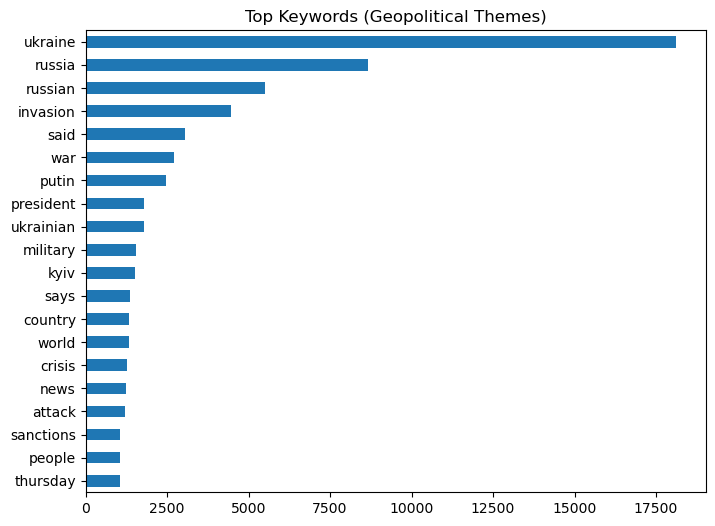

In [29]:
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['clean_text'])

words = vectorizer.get_feature_names_out()
freq = X.sum(axis=0).A1

pd.Series(freq, index=words).sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Top Keywords (Geopolitical Themes)")
plt.show()

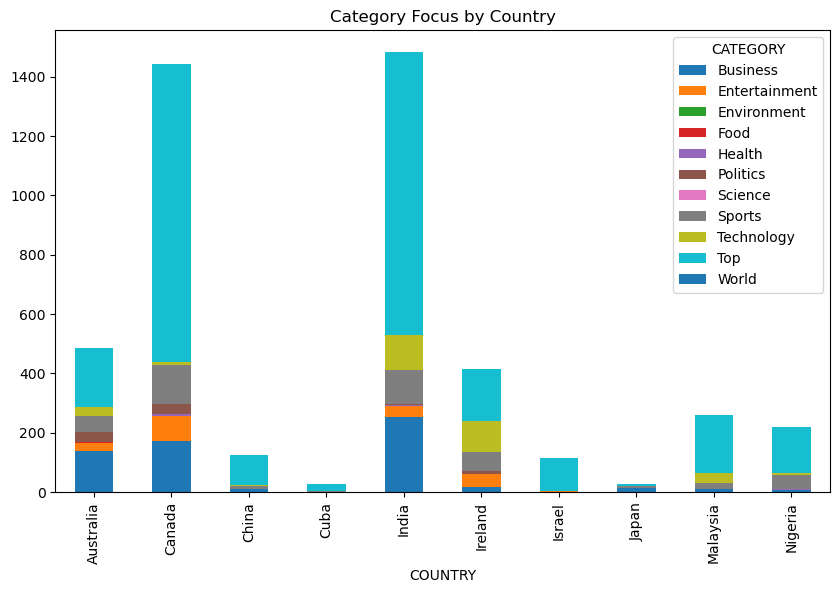

In [30]:
ct = pd.crosstab(df['COUNTRY'], df['CATEGORY'])

ct.head(10).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Category Focus by Country")
plt.show()

India → strategic neutrality + analysis
Canada → social/public framing
Western allies → broader coverage
China → limited + controlled
Smaller nations → headline-only tracking

<b> RQ5: Who is winning the narrative — Ukraine or Russia?

In [31]:
df['ukraine_mention'] = df['clean_text'].str.contains('ukraine')
df['russia_mention'] = df['clean_text'].str.contains('russia')

In [32]:
uk_sent = df[df['ukraine_mention']]['sentiment'].mean()
ru_sent = df[df['russia_mention']]['sentiment'].mean()

print("Ukraine sentiment:", uk_sent)
print("Russia sentiment:", ru_sent)

Ukraine sentiment: 0.03750142111272876
Russia sentiment: 0.03635720761307719


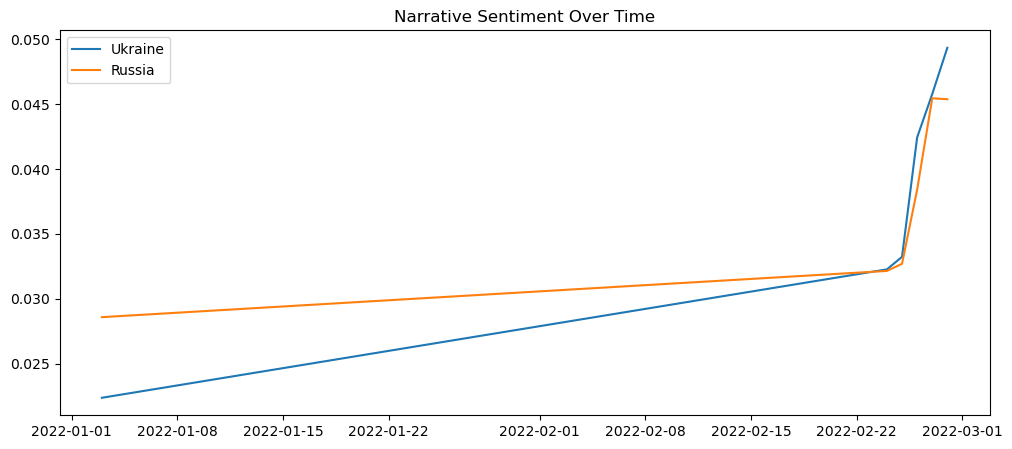

In [33]:
uk_timeline = df[df['ukraine_mention']].groupby('date')['sentiment'].mean()
ru_timeline = df[df['russia_mention']].groupby('date')['sentiment'].mean()

plt.figure(figsize=(12,5))
plt.plot(uk_timeline, label='Ukraine')
plt.plot(ru_timeline, label='Russia')
plt.legend()
plt.title("Narrative Sentiment Over Time")
plt.show()

Temporal sentiment analysis indicates that while early coverage exhibited slightly more neutral-to-positive framing for Russia, Ukraine’s sentiment steadily increased and ultimately surpassed Russia, culminating in a sharper positive spike. This suggests a progressive shift toward pro-Ukraine framing, likely driven by humanitarian sympathy and international support narratives, demonstrating that Ukraine holds the stronger global media narrative over time.

In [39]:
import plotly.express as px

In [40]:
df['text'] = df['TITLE'].fillna('') + " " + df['DESCRIPTION'].fillna('')

# sentiment
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


country_stats = (
    df.groupby('COUNTRY')
      .agg(
          avg_sentiment=('sentiment','mean'),
          articles=('sentiment','count')
      )
      .reset_index()
)

def stance(s):
    if s > 0.02:
        return "Supporter"
    elif s < -0.02:
        return "Hater"
    else:
        return "Neutral"

country_stats['stance'] = country_stats['avg_sentiment'].apply(stance)


fig = px.choropleth(
    country_stats,
    locations="COUNTRY",
    locationmode="country names",
    color="stance",
    hover_data=["avg_sentiment", "articles"],
    title="Global Media Stance Toward Ukraine",
)
fig.show()

fig2 = px.choropleth(
    country_stats,
    locations="COUNTRY",
    locationmode="country names",
    color="avg_sentiment",
    color_continuous_scale="RdBu",
    hover_data=["articles"],
    title="Global Sentiment Intensity Toward Ukraine"
)
fig2.show()

“Global media sentiment mapping reveals a broad pro-Ukraine narrative, with most countries exhibiting positive or neutral sentiment and minimal explicitly negative framing. Support is strongest in Western democracies, while neutral tones dominate parts of the Global South. Strong anti-Ukraine media sentiment is largely absent.”

Global sentiment intensity mapping shows that Ukraine coverage is predominantly neutral-to-positive, with few strongly negative regions. This indicates a low-propaganda, information-oriented media environment overall, but with a consistent sympathetic tilt toward Ukraine. The absence of concentrated negative sentiment suggests Ukraine holds narrative advantage internationally.